In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-07-31 11:22:44.434727: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

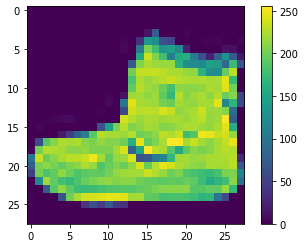

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

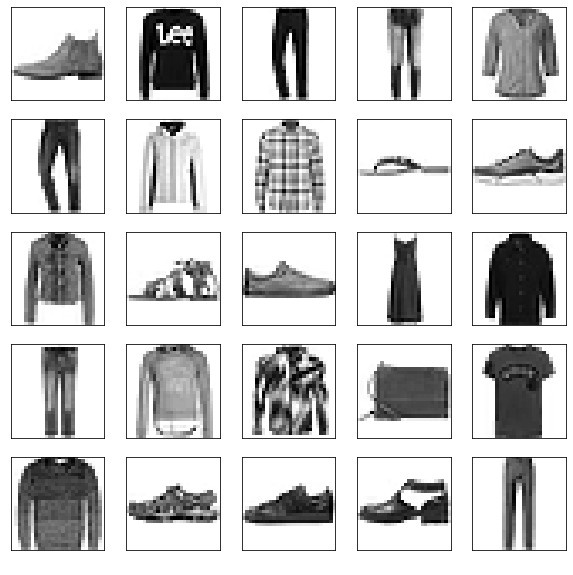

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],c="w")
plt.show()

In [8]:
 model = keras.Sequential([
     # 1st layer: Transform th format of images from 2d array to a 1D array
     # 1st layer: UNpacking pixels
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(10, activation=tf.nn.softmax) # Returns an array of 10 probability scores
 ])
    
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20)

Epoch 1/20


2022-07-31 11:22:52.866547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7889 - accuracy: 0.7775
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4574 - accuracy: 0.8362
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8497
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.8579
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3714 - accuracy: 0.8655
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3558 - accuracy: 0.8726
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8759
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3310 - accuracy: 0.8807
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3284 - accuracy: 0.8808
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3140 - accurac

In [9]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 653us/step


In [10]:
predictions[0]

array([3.4018481e-07, 5.9595662e-10, 6.8676910e-14, 2.3427900e-07,
       5.6439173e-15, 1.8456103e-02, 4.9073272e-08, 1.3508177e-02,
       1.5292888e-13, 9.6803510e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

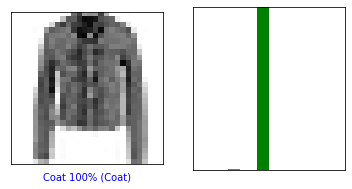

In [14]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

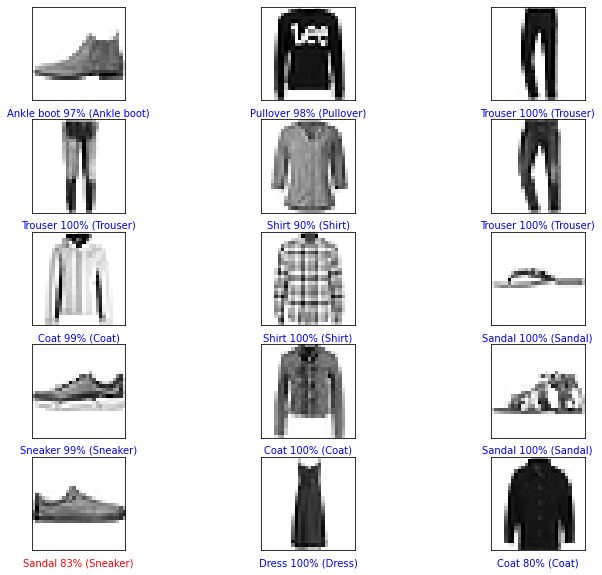

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    
plt.show()

In [17]:
img = test_images[0]
img = np.expand_dims(img,0)
img.shape

(1, 28, 28)

In [18]:
predictions_single = model.predict(img)

1/1 [==============================] - 0s 12ms/step


In [19]:
class_names[np.argmax(predictions_single)]

'Ankle boot'

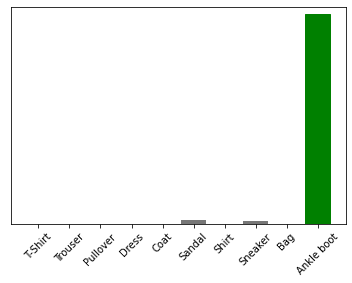

In [20]:
# Predictions for all the images
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)